![alt text](img/MIoT_ML.png "MIoT_ML")

# Unidad 1 - Análisis y exploración de datos

El objetivo principal de esta práctica es que os familiaricéis con los conceptos y las aproximaciones clave para la exploración de datos en el desarrollo de modelos de Aprendizaje Automático (ML). Para ello,  la mayor parte del contenido se dedica a explicar estos aspectos,  apoyándose en ejemplos concretos que ilustran su aplicación a un problema real.  Es crucial que dediquéis tiempo a leer y comprender el material,  en lugar de simplemente ejecutar el código.  Os invitamos a experimentar modificando y variando el código proporcionado para que podáis explorar las distintas opciones y profundizar en su funcionamiento.


El Notebook contiene varios ejercicios sencillos. Debéis desarrollarlos durante la clase y enviarlos por el aula virtual del curso, en la tarea correspondiente.

## Referencias útiles para la práctica
1. API Pandas: [https://pandas.pydata.org/docs/reference/index.html](https://pandas.pydata.org/docs/reference/index.html)
2. API Scikit-learn: [https://scikit-learn.org/stable/api/index.html](https://scikit-learn.org/stable/api/index.html)
3. API Seaborn: [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)
4. Dataset para el ejercicio: [https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)
5. Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.", 2022. 



## 1. Flujo de trabajo básico en problemas de Aprendizaje Automático (*ML workflow*)
A la hora de enfrentarnos a un nuevo problema de Aprendizaje Automático (ML), existen una serie de pasos típicos y comunes que debemos afrontar:
1. Entender el problema y su contexto.
2. Obtener los datos (histórico).
3. Explorar, analizar y entender los datos.
4. Preparar los datos para los modelos.
5. Seleccionar, optimizar y entrenar los modelos ML.
6. Evaluar y presentar el modelo seleccionado.
7. Desplegar, monitorizar y mantener la solución.

La mayoría de los cursos de ML se centran en los pasos 5 y 6, pero la realidad es que entender el problema, su contexto y preparar adecuadamente los datos para desarrollar los modelos, es esencial para obtener buenos resultados y suele implicar el mayor porcentaje de tiempo que dedicamos al desarrollo de modelos. En esta práctica nos centraremos, a modo de introducción, en una primera iteración de los pasos del 1 al 3.


## 2. Entender el problema

De poco vale saber realizar modelos de ML si no entendemos la finalidad y el objetivo de estos. Lo primero que necesitamos tener claro es nuestro problema, su contexto y lo que queremos modelar. En la mayor parte de los problemas del mundo real, el conocimiento experto es clave para poder conseguir buenos resultados, ya que es el que nos va a permitir poder interpretar los datos y los resultados y trabajar en consecuencia. 

En nuestro problema, el conocimiento experto viene dado por el enunciado y vosotros tendréis que analizar los datos para profundizar en dicho conocimiento y contexto antes de empezar a modelar.


### 2.1. Descripción del problema
**¡Bienvenido a Machine Learning Housing Corporation!**

Tu primera tarea es utilizar datos del censo para construir un modelo que prediga los precios de la vivienda en el estado de California. Estos datos incluyen métricas como la población, sus ingresos y los precios de las viviendas para cada *bloque* (área geográfica) de California. Los bloques son las unidades geográficas más pequeñas para las cuales la Oficina del Censo de EE. UU. publica datos (un *bloque* generalmente tiene una población entre 600 y 3.000 personas). *Nos referiremos a estos bloques como **manzanas** durante el ejercicio*. 

El conjunto de datos obtenido del Censo de EE. UU. para el estado de California incluye las siguientes variables/características/atributos para cada manzana:


- **longitude**: Coordenada geográfica de longitud. Un valor más alto indica que está más al oeste.
- **latitude**: Coordenada geográfica de latitud. Un valor más alto indica que está más al norte.
- **housingMedianAge**: La mediana de la antigüedad de las viviendas de una manzana.
- **totalRooms**: Número total de habitaciones en una manzana.
- **totalBedrooms**: Número total de dormitorios en una manzana.
- **households**: Número total de viviendas en una manzana.
- **population**: Número total de personas que residen en una manzana.
- **medianIncome**: La mediana de los ingresos de las viviendas en una manzana. 
- **oceanProximity**: Ubicación de la manzana con respecto al océano/mar.
- **medianHouseValue**: La mediana del valor de las viviendas en una manzana (variable a predecir).

![alt text](img/california.png "California")

### 2.2. Contexto del problema

Más allá de los trabajos académicos, lo habitual es que el desarrollo de un modelo no sea el objetivo final. Típicamente se hará con un fin empresarial o comercial y es importante entender cómo espera la empresa utilizar este modelo y beneficiarse de él. Conocer el objetivo final es importante porque determinará cómo se enmarca el problema, qué algoritmos se seleccionarán, qué medida de rendimiento se utilizará para evaluar el modelo, y cuánto esfuerzo se dedicará a ajustarlo.

En el marco de este práctica, y tras consultarlo con el gerente de *Machine Learning Housing Corporation*, se nos informa de que el resultado del modelo (predicción del atributo *medianHouseValue*) será la entrada de un modelo posterior (junto con otras entradas), que determinará si vale la pena invertir o no en una zona concreta. Acertar en esa predicción de inversión será clave para los ingresos de nuestra organización. 

En este punto es clave entender cómo se gestiona actualmente el sistema de inversión y cómo se estima el precio de la vivienda en una zona concreta. Es importante porque la medida actual será nuestra métrica base contra la que compararnos (debemos generar un sistema de predicción que, al menos, mejore el actual). Desde la dirección se nos informa que actualmente es un grupo de expertos el que analiza de forma minuciosa y valora la zona empleando un sistema de reglas complejo. La empresa considera que este sistema es muy costoso y que requiere mucho tiempo, además de que sus estimaciones no son precisas (errores medios del 30%).

Para poder desarrollar el sistema de predicción del precio de la vivienda en una manzana geográfica, nuestra empresa considera que el conjunto de datos obtenido del Censo de EE. UU. para el estado de California es el apropiado, ya que son muy completos y actualizados.



## 3. Obtener los datos
Para poder analizar los datos, lo primero que necesitamos es descargarlos y leerlos en el programa. En el repositorio de la materia encontraréis el dataset que emplearemos para esta práctica (*housing.csv*), extraído de la plataforma Kaggle. Pero Kaggle permite descargar directamente esos datos empleando la librería *kagglehub*, por lo que también podéis acceder a la web de Kaggle en medio de vuestro programa y descargar el dataset desde allí: [https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Para cargar los datos, y posteriormente analizarlos, emplearemos la librería [Pandas](https://pandas.pydata.org/).

[Pandas](https://pandas.pydata.org/) es una librería de Python de código abierto que proporciona herramientas de análisis y manipulación de datos de alto rendimiento, y que podemos considerar el *estándar de facto* en proyectos de ML. En esencia, Pandas permite:

- **Organizar datos**: Similar a una hoja de cálculo de Excel, pero con multitud de extras. Pandas permite crear estructuras de datos como *DataFrames* (tablas) y *Series* (listas) para almacenar y organizar los datos de forma eficiente. Un *Dataframe* será la tabla de datos en su conjunto, mientras que una *Series*, será, por ejemplo, una columna, los valores de un atributo para todas las muestras (por ejemplo, todos los valores de *population*).
- **Limpiar y transformar datos**: Entre otras cosas, Pandas permite limpiar datos (*cleaning data*), gestionar valores faltantes (*data imputation*) y transformar y reorganizar la información para prepararla para el análisis posterior.
- **Analizar datos**: Pandas ofrece múltiples funciones para realizar análisis estadísticos, calcular estadísticas descriptivas, agrupar datos, y mucho más.



In [1]:
# Obtener los datos
# This package allows to directly download the CSV from Kaggle
try:
    import kagglehub
except ImportError as err:
    !pip install kagglehub
    import kagglehub

# this library is only to improve the redability of some structures
# https://rich.readthedocs.io/en/stable/introduction.html
try:
    from rich import print
except ImportError as err:
    !pip install rich
    from rich import print

# Download latest version of dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)
# file name: housing.csv


Path to dataset files: /Users/agil/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1

Una vez descargado el dataset, lo podremos cargar con Pandas para poder analizarlo. Pandas permite cargar datos desde multitud de [fuentes](https://pandas.pydata.org/docs/reference/io.html), aunque de forma bastante habitual os encontraréis que los datos os los proporcionarán en ficheros CSV.
<code>read_csv(path)</code> es un [método](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de Pandas que carga los datos desde un fichero CSV y devuelve un *DataFrame*, que es una de las estructuras de datos básicas de la librería. Un *DataFrame* es una estructura de datos tabular, similar a una hoja de cálculo, que se utiliza para organizar datos en filas y columnas. El método [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) tiene muchos parámetros que podemos configurar según el problema, pero en este caso dejaremos los valores por defecto.

In [2]:
try:
    import pandas as pd
except ImportError as err:
    !pip install pandas
    import pandas as pd
dataset = pd.read_csv(path+"/housing.csv") # Carga datos desde un CSV y devuelve un DataFrame 


## 4. Explorar los datos

### 4.1. Ver los datos

A falta de conocimiento experto que nos ayude, deberemos explorar minuciosamente los datos para poder obtener un conocimiento profundo de estos. Lo primero que podemos hacer es mostrar algunas de las filas del dataset para ver qué forma tienen los datos. Para ello usaremos el método <code>head()</code> del *DataFrame*, que muestra las primeras filas (recordad que cada fila representa una manzana).

In [ ]:
dataset.head()

A la hora de empezar a enfrentarnos a los datos, podemos empezar por conocer el tamaño del dataset, el tipo de datos, o si los datos contienen nulos (valores ausentes).

Conocer el **tipo de datos** de las variables en un dataset es crucial para el ML porque determina cómo se procesa y analiza la información. Algunos algoritmos solo funcionan con tipos de datos específicos (numéricos, categóricos), y comprenderlos permite la correcta selección de métodos, la aplicación de transformaciones adecuadas, y un mejor rendimiento del modelo.

Los **valores nulos** en un dataset pueden causar problemas al entrenar un modelo de ML, ya que muchos algoritmos no pueden manejarlos directamente. Gestionarlos (eliminándolos o imputándolos) ayuda a prevenir errores, mejorar la precisión del modelo, y asegurar resultados más confiables.

El método <code>info()</code> del *Dataframe* (recordad que *dataset* es un *Dataframe*) nos proporciona un poco más de información. Entre otras cosas, nos dice el tipo de datos (en caso de que lo pueda identificar automáticamente). Si conocemos bien los datos, es posible indicar el tipo de cada atributo al cargarlo con <code>read_csv()</code> a través del parámetro <code>dtype</code>.

Fijaos que todos los tipos son numéricos, excepto *ocean_proximity* que es de tipo *Object* (una clase genérica de Python). En este caso, si vemos el fichero de datos original, podremos ver que es un tipo categórico (cadena de texto). 

En el caso de los nulos, se puede observar que, del total de filas del dataset, solo un atributo tiene valores faltantes.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


¿Cuántos nulos tienen los atributos del datasset? Se puede calcular automáticamente con las siguientes funciones:

In [4]:
# Obtener los valores nulos 
# isnull genera una matriz de booleanos (uno por celda) siendo True un nulo. 
# Los booleanos pueden interpretarse como enteros True=1, False=0
# La suma de un dataframe, por defecto, es por columnas
dataset.isnull().sum() 


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nos interesa conocer el contenido de las variables no numéricas. Una variable de texto que tenga valores diferentes para cada una de las observaciones no nos aporta información; pero una variable categórica, en la que todas las observaciones tomen uno de los 'n' posibles valores (siendo 'n' un valor pequeño), sí que resulta de utilidad. 


Comprobemos los valores (categorías) que contiene *ocean_proximity*, y cómo se distribuyen las observaciones.

In [5]:
# Obtener los valores de una variable categórica

# dataset['ocean_proximity'].unique() proporciona una lista con los distintos valores de la columna
print("Valores únicos de ocean_proximity: ", ", ".join(dataset['ocean_proximity'].unique()))

# Obtener el número de instancias para cada categoría
# dataset['ocean_proximity'].value_counts() cuenta el número de veces que aparece cada valor
print(dataset['ocean_proximity'].value_counts()) # Obtiene los valores únicos de una columna de un DataFrame y las observaciones de cada uno


# Obtener el porcentaje de instancias para cada categoría
# print(dataset['ocean_proximity'].value_counts()/len(dataset)*100) # Obtiene el porcentaje de observaciones para cada categoría
# Lo visualizamos de una forma más apropiada
aux = dataset['ocean_proximity'].value_counts()/len(dataset)*100
print("Porcentaje de observaciones por categoría de 'ocean_proximity'")
for cat in dataset['ocean_proximity'].unique():
    print(f"{cat}: {round(aux[cat],2)}%")



Valores únicos de ocean_proximity:  NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Porcentaje de observaciones por categoría de 'ocean_proximity'

NEAR BAY: 11.09%

<1H OCEAN: 44.26%

INLAND: 31.74%

NEAR OCEAN: 12.88%

ISLAND: 0.02%

**Ejercicio para entregar en el aula virtual** 

**Preguntas**
- Escribe las sentencias necesarias para mostrar las observaciones que ocupan las posiciones de la 100 a la 103 incluidas.
- Escribe las sentencias necesarias para mostrar las observaciones que tengan el valor ISLAND en su campo *ocean_proximity*.
- Escribe las sentencias necesarias para mostrar sólo las medianas de los precios (*median_house_value*) de las observaciones del apartado anterior.


In [ ]:
### EJERCICIO ###
# Genera el código necesario para mostrar las observaciones
# 1) las observaciones que ocupan las posiciones de la 100 a la 103 incluidas
# 2) las observaciones que tengan el valor ISLAND en su campo "ocean_proximity"
# 3) las medianas de los precios ("median_house_value") de las observaciones del apartado anterior


### 4.2. Datos duplicados
Si detectamos observaciones duplicadas en nuestro conjunto de datos, lo habitual es que queramos eliminarlas al comienzo, ya que no queremos influir en la analítica o sobreentrenar los modelos con datos repetidos.  Los *DataFrame* de Pandas tienen un método (<code>[duplicated()</code>](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)) para identificar filas duplicadas. En nuestro caso, podemos comprobar que no tenemos dicho problema. Si existiese, Pandas nos proporciona un método para eliminarlos [<code>drop_duplicates</code>](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

In [ ]:
print(f"Filas duplicadas: {dataset.duplicated().sum()}")

## 5. Reservar un conjunto de Test 

Puede resultar contraintuitivo reservar voluntariamente una parte de los datos al comienzo de un proyecto. Es natural pensar que antes de tomar decisiones sobre qué algoritmos o técnicas utilizar, deberías analizar a fondo los datos. Aunque esta intuición tiene sentido, también es crucial considerar cómo funciona nuestro cerebro. Si examinas el conjunto de test desde el inicio, podrías identificar patrones aparentemente interesantes que, en realidad, no generalizan bien. Esto puede llevarte a aplicar técnicas de preprocesado o elegir un modelo de aprendizaje automático inapropiado. Como consecuencia, la estimación del error de generalización usando el conjunto de test será demasiado optimista, y el sistema implementado no tendrá el rendimiento esperado. A este fenómeno se le conoce como sesgo de espionaje de datos (**snooping bias**), y evitarlo es una de las razones clave para separar los datos correctamente desde el principio.

Veremos en las clases de teoría cuándo debemos separar los datos en 2 conjuntos (Entrenamiento y Test) o en 3 conjuntos (Entrenamiento, Validación y Test), así como las diferentes formas de repartir los datos (Secuencial, Aleatorio y Aleatorio Estratificado). Por simplificación, en este ejemplo nos centraremos en la división en dos conjuntos. 

### 5.1 División secuencial
En una primera aproximación, podemos decidir dividir secuencialmente el dataset, escogiendo, por ejemplo, el primer 70% de los datos para el entrenamiento y el 30% restante para el test (posteriormente, este conjunto lo podremos dividir en validación y test si es necesario). Esta aproximación puede ser muy problemática si los datos tienen, en su ordenamiento, dependencias temporales, geográficas, etc. Imaginaos que el dataset tiene datos censales ordenados por año, y los datos que usamos para entrenar están centrados en unos años concretos del pasado, mientras que los datos del último año son los que usamos para testear. El problema y el precio de la vivienda ha evolucionado con el tiempo, por lo que los datos del pasado pueden no ser buenos para generalizar una solución actual.







In [ ]:

def seleccionar_datos_secuenciales(train_ratio=0.7):
    # Función para generar dos conjuntos de datos secuenciales
    train_size = int(len(dataset)*train_ratio)
    print(f"Observaciones del conjunto de entrenamiento: {train_size}")
    print(f"Observaciones del conjunto de test: {len(dataset)-train_size}")
    return dataset[:train_size], dataset[train_size:]

trainset, testset = seleccionar_datos_secuenciales()

### 5.2. División de datos aleatoria
Dados los inconvenientes potenciales de repartir los datos de manera secuencial, una posible aproximación es repartirlos de forma aleatoria. Existen diferentes formas de hacerlo, pero una de las más habituales es el método <code>train_test_split()</code> proporcionado por la librería Scikit-learn. 

**IMPORTANTE**: La **repetibilidad** es clave en ML. Cada vez que ejecutemos nuestros analísis y entrenamientos de modelos, deberíamos de conseguir los mismos resultados. A la hora de repartir los datos de forma aleatoria, también debemos de asegurarnos que, tras cada ejecución obtenemos el mismo reparto. En informática no tenemos números aleatorios puros, lo que tenemos son números pseudoaleatorios.  Los números pseudoaleatorios se generan mediante algoritmos deterministas, es decir, siguen una fórmula que, dada una semilla inicial, produce una secuencia de números que parecen aleatorios, pero en realidad son predecibles si se conoce el algoritmo y la semilla. Dado esta característica, es **importante establecer la semilla** que nos permitirá repetir una secuencia aleatoria en el futuro.



In [6]:
# Demostración del uso de una semilla para generar números aleatorios
try:
    import numpy as np
except ImportError as err:
    !pip install numpy
    import numpy as np

SEED = 1234 # Semilla para asegurarnos que siempre se generen los mismos valores aleatorios

for i in range(3):
    print("Números aleatorios SIN semilla:", np.random.rand(5))

print(10*"-")
for i in range(3):
    np.random.seed(SEED)  # Establecer la semilla
    print("Números aleatorios CON semilla:", np.random.rand(5))


Números aleatorios SIN semilla: [0.73176764 0.221331   0.94215428 0.93357335 0.71131765]

Números aleatorios SIN semilla: [0.66303289 0.68704546 0.46637712 0.75425226 0.15964614]

Números aleatorios SIN semilla: [0.34520351 0.57406808 0.89249937 0.03922997 0.25545197]

----------

Números aleatorios CON semilla: [0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]

Números aleatorios CON semilla: [0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]

Números aleatorios CON semilla: [0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]

In [7]:
# Generación de datasets aleatorios con Scikit-learn
try:
    from sklearn.model_selection import train_test_split
except ImportError as err:
    !pip install sklearn
    from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(dataset, test_size=0.3, train_size=0.7, random_state=SEED, shuffle=True)


### 5.3. División estratificada
La división "aleatoria" pura puede llevar a repartos en conjuntos en los que no se respete la distribución de alguna variable o **característica relevante**. Imaginemos que tenemos un problema de clasificación de correos electrónicos, en los que la mayoría de nuestros datos son correos válidos, mientras que un porcentaje muy pequeño es de correos *spam*. Una división aleatoria podría llevar a que el conjunto de datos de Test no contuviese ningún correo de *spam*. Para evitar esto, aparece la división aleatoria estratificada, que permite mantener la distribución de datos, **en una variable concreta**, entre el conjunto original y los de Test y Entrenamiento.  El método  <code>train_test_split</code> nos permite agregar el parámetro *stratify* para indicar la variable de referencia para realizar la distribución de datos (típicamente ésta es la variable a predecir).

Para probar cómo funciona la división estratificada usaremos el método <code>train_test_split</code> y nos centraremos en la variable categórica *ocean_proximity*. En nuestro caso la variable a predecir -*medianHouseValue*- es continua, por lo que, para usarla, tendríamos antes que estratificarla (generaríamos otra variable discreta que la dividiese en rangos y usaríamos la nueva para estratificar). Por suerte, como veremos en breve, la variable categórica *ocean_proximity* también es **relevante** (está muy relacionada con el valor de las viviendas).

Probaremos a dividir los datos SIN y CON estratificación, y comprobaremos cómo se reparten las categorías de *ocean_proximity* en los conjuntos resultantes.

In [8]:
# Distribución sin estratificado
print("DATASET ORIGINAL")
print(dataset['ocean_proximity'].value_counts()/len(dataset)*100) # Obtiene el porcentaje de observaciones para cada categoría
print("ENTRENAMIENTO")
print(trainset['ocean_proximity'].value_counts()/len(trainset)*100) # Obtiene el porcentaje de observaciones para cada categoría
print("TEST")
print(testset['ocean_proximity'].value_counts()/len(testset)*100) # Obtiene el porcentaje de observaciones para cada categoría


DATASET ORIGINAL

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

ENTRENAMIENTO

ocean_proximity
<1H OCEAN     44.223714
INLAND        31.625943
NEAR OCEAN    12.853880
NEAR BAY      11.268776
ISLAND         0.027687
Name: count, dtype: float64

TEST

ocean_proximity
<1H OCEAN     44.363695
INLAND        31.992894
NEAR OCEAN    12.936047
NEAR BAY      10.691214
ISLAND         0.016150
Name: count, dtype: float64

In [9]:
# Distribución con estratificado
trainset, testset = train_test_split(dataset, test_size=0.3, train_size=0.7, random_state=SEED, shuffle=True, stratify=dataset["ocean_proximity"])

print("DATASET ORIGINAL")
print(dataset['ocean_proximity'].value_counts()/len(dataset)*100) # Obtiene el porcentaje de observaciones para cada categoría
print("ENTRENAMIENTO")
print(trainset['ocean_proximity'].value_counts()/len(trainset)*100) # Obtiene el porcentaje de observaciones para cada categoría
print("TEST")
print(testset['ocean_proximity'].value_counts()/len(testset)*100) # Obtiene el porcentaje de observaciones para cada categoría



DATASET ORIGINAL

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

ENTRENAMIENTO

ocean_proximity
<1H OCEAN     44.265245
INLAND        31.736693
NEAR OCEAN    12.874645
NEAR BAY      11.095729
ISLAND         0.027687
Name: count, dtype: float64

TEST

ocean_proximity
<1H OCEAN     44.250646
INLAND        31.750646
NEAR OCEAN    12.887597
NEAR BAY      11.094961
ISLAND         0.016150
Name: count, dtype: float64


**IMPORTANTE:**
A partir de este momento, toda la analítica la realizaremos sobre el conjunto de entrenamiento (trainset) para evitar el *sesgo de espionaje*. **Recordad** establecer la semilla para asegurar la repetibilidad, y que una nueva ejecución de este Notebook lleve a los mismos repartos.


## 6. Visualizar y entender los datos

### 6.1. Estadística básica

Podemos generar una estadística básica para conocer mejor los datos empleando el método [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) sobre el *Dataframe* que representa nuestro conjunto de entrenamiento. 

Las filas de **count**, **mean**, **min** y **max**  son autoexplicativas, pero es necesario tener en cuenta que los valores nulos son ignorados (variable *total_bedrooms*). La fila **std** muestra la desviación estándar, y las filas 25%, 50% y 75% simbolizan los **percentiles** correspondientes. Un percentil indica el valor por debajo del cual cae un porcentaje dado de observaciones del dataset. Por ejemplo, el 25% de las manzanas tienen un valor para la mediana de la edad inferior a 18, mientras que el 50% es inferior a 29 y el 75% es inferior a 37. 

Dada una columna del dataset (una *Series*), existen las correspondientes funciones (min, max, std...) para calcular los correspondientes valores (y muchas otras de distinto tipo).



In [10]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**¿Os llama algo la atención?**

Con estos datos, ya llama la atención que la mediana de los ingresos sea un valor entre 0.5 y 15 (**recordad** que el punto es el separador decimal), o que la mediana del valor de la vivienda tenga un máximo de 500.001,00$ (parece poco respecto a los valores de EE.UU).

### 6.2. Histogramas
Los histogramas pueden aportarnos una perspectiva rápida de cómo están distribuidos los datos, y eso nos puede proporcionar información útil y resaltar posibles anomalías. Para ello, podemos emplear la librería Matplotlib.

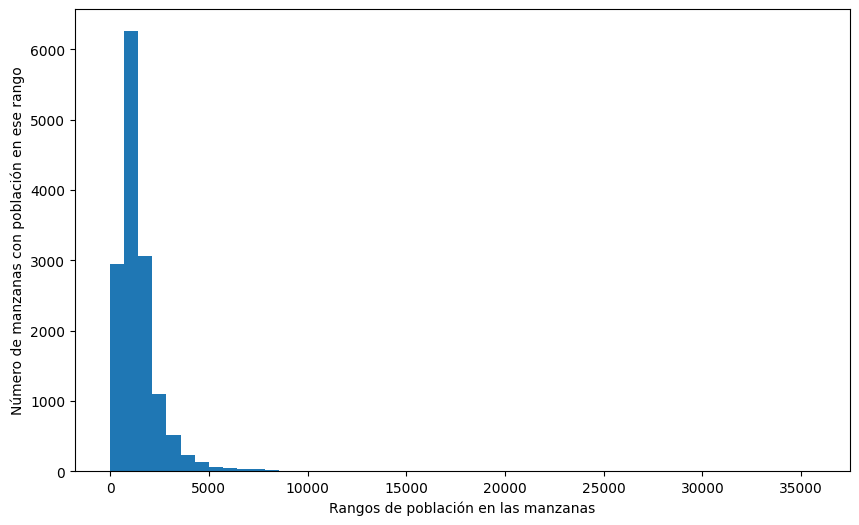

In [11]:
try:
    import matplotlib.pyplot as plt
except ImportError as err:
    !pip install matplotlib
    import matplotlib.pyplot as plt

# Histograma para la variable 'population'
plt.figure(figsize=(10, 6))  
plt.hist(trainset['population'], bins=50)  # hay 50 rangos, aunque a partir de 10.000 no se observan por la escala
plt.xlabel("Rangos de población en las manzanas")
plt.ylabel("Número de manzanas con población en ese rango")
plt.show()  # innecesario en un notebook, pero sí en caso de un script tradicional


Pandas permite generar gráficos básicos usando implícitamente la librería Matplotlib, por lo que una alternativa al código anterior sería utilizar directamente el método <code>hist()</code> del *Dataframe*, que hace un uso implícito del objeto *plt* de Matplotlib.

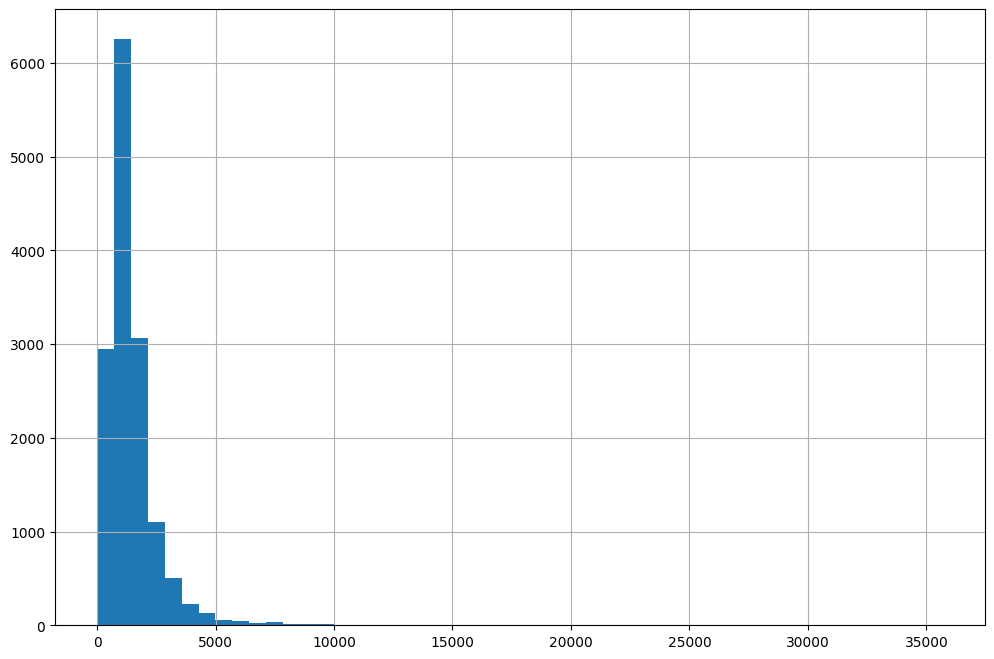

In [13]:
# Histograma para la variable 'population'
trainset['population'].hist(bins=50, figsize=(12, 8))
plt.show()


Y también es posible dibujar conjuntamente los histográmas de todas las variables numéricas.

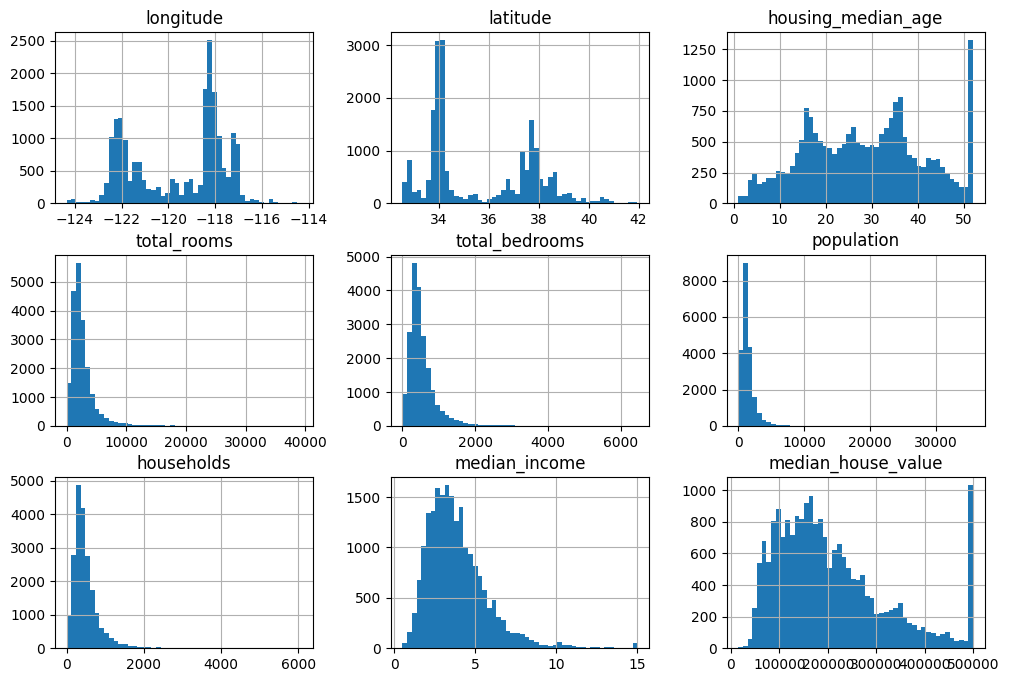

In [14]:
# Histograma para todas las variables
dataset.hist(bins=50, figsize=(12, 8))
plt.show()

Otra librería interesante para generar gráficos, que también se basa en Matplotlib, es **Seaborn**.

[Seaborn](https://seaborn.pydata.org/index.html) es una librería de Python para visualización de datos estadísticos. Construida sobre matplotlib, proporciona una interfaz de alto nivel para crear gráficos atractivos e informativos. Ofrece una gran variedad de opciones para visualizar distribuciones, relaciones entre variables y patrones en datos multidimensionales, facilitando el análisis exploratorio y la comunicación de resultados.

Alternativa que emplea **Seaborn**

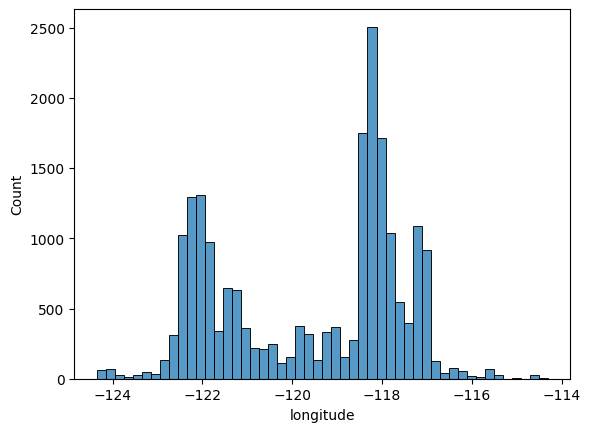

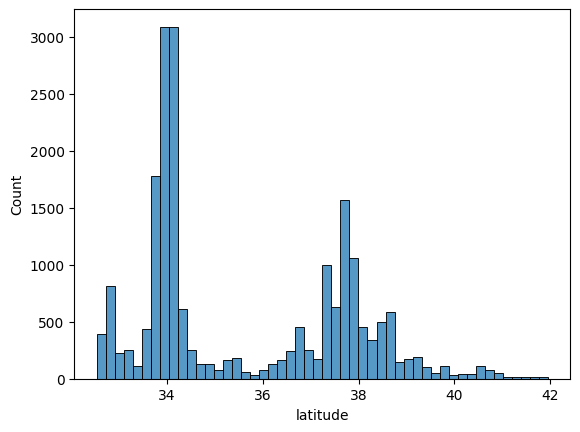

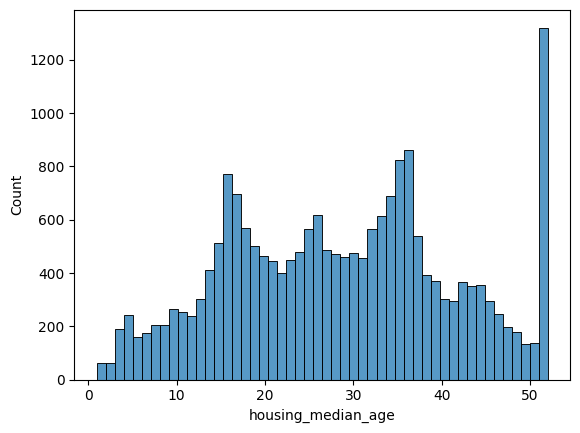

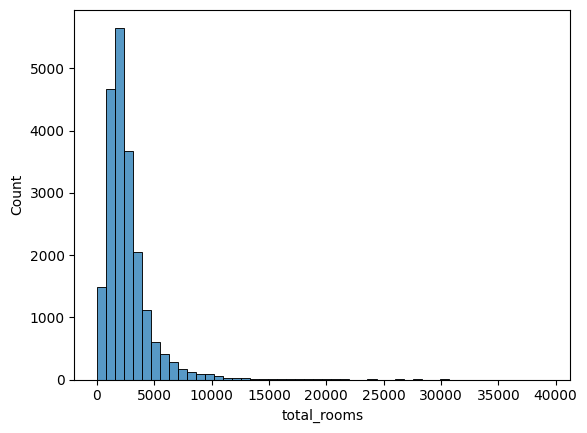

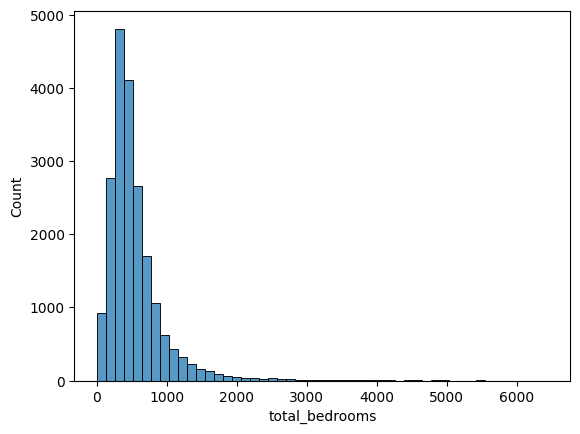

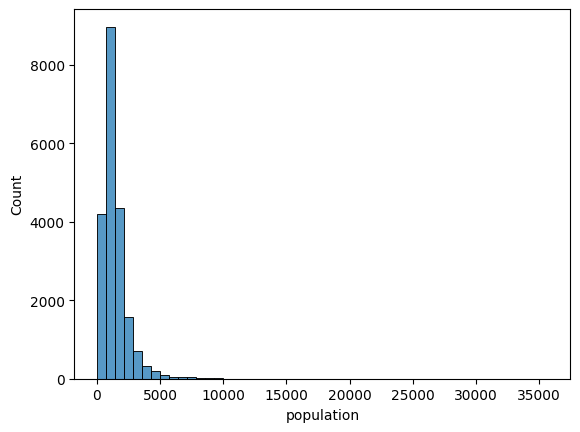

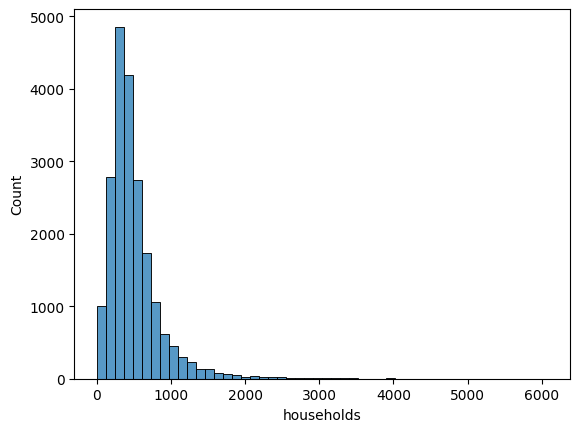

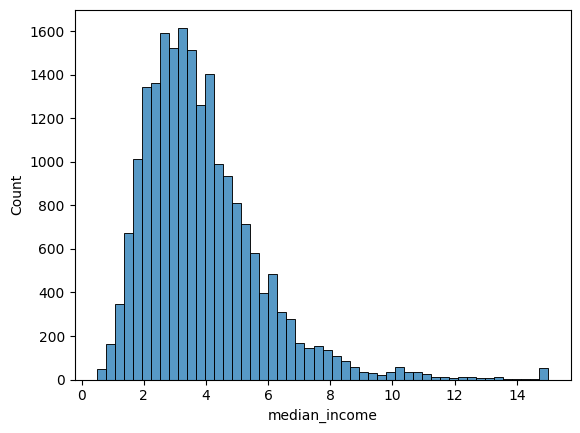

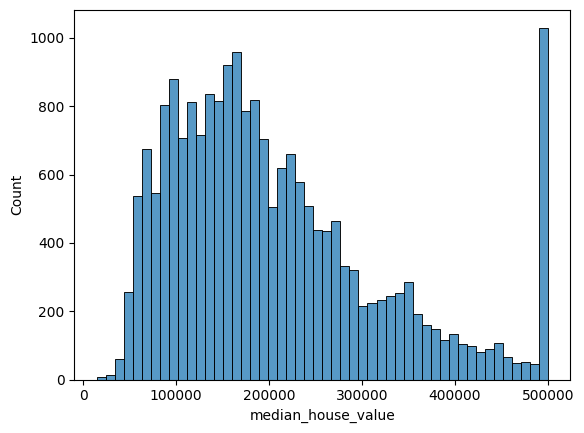

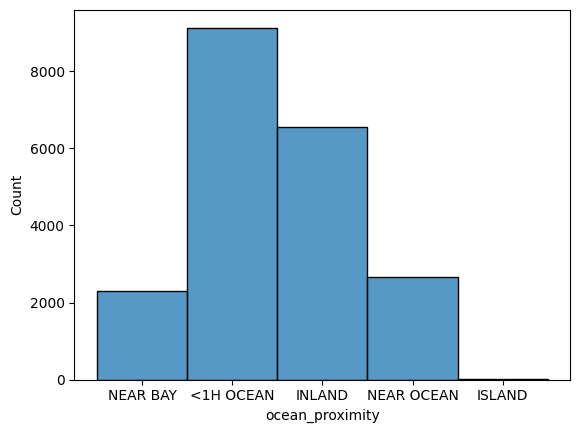

In [15]:
try:
    import seaborn as sns
except ImportError as err:
    !pip install seaborn
    import seaborn as sns

for col in dataset.columns:
    sns.histplot(data=dataset[col], bins=50)
    plt.show() # Seaborn configura implícitamente el objeto plt

**¿Qué os llama la atención de los histogramas?**

A la vista de los histogramas, y teniendo en cuenta también los valores generados por el método *describe()*, llaman la atención varias cosas:
1. Unidades de la mediana del salario (*median_income*): Los datos no vienen en miles de dolares, están escalados. Los datos reprensentan decenas de miles de dolares, es decir, el valor 3 significa 30.0000,00$. El escalado del atributo no supone un problema.
2. Limites de la mediana del salario (*median_income*): La mediana del salario tiene un límite inferior y superior en el que se agrupan salarios fuera de ese rango. Sobre todo, es claro en la parte superior donde se agrupan bastantes valores en la cola.
3. La mediana del valor de las casas (*media_house_value*) tiene un límite superior, lo que es un problema para poder modelar, ya que es la variable objetivo (un modelo pensaría que no se puede sobrepasar dicho límite).
4. La mediana de la edad de las viviendas (*housing_median_age*) también está limitado.
5. Los atributos están en escalas muy diferentes, lo que puede dificultar o impedir aprender a los modelos de ML. En este caso, podremos aplicar algún tipo de normalización para solucionarlo.
6. Muchos de los histogramas están sesgados a la derecha: se extienden mucho más hacia la derecha que hacia la izquierda. Esto puede dificultar la detección de patrones, pero podremos intentar transformar estos atributos para que tengan distribuciones más simétricas.

**Ejercicio para entregar en el aula virtual** 

**Preguntas**
- ¿Qué porcentaje de los datos de entrenamiento tienen el límite mínimo de la mediana del salario (*median_income*) asociado?
- ¿Qué porcentaje de los datos de entrenamiento tienen el límite máximo de la mediana del salario (*median_income*) asociado?
- ¿Qué porcentaje de los datos de entrenamiento tienen como mediana del valor de la casa (*median_house_value*) el límite máximo?
- ¿Qué porcentaje de los datos de entrenamiento tienen como mediana de la edad de las viviendas (*housing_median_age*) el límite máximo?


In [ ]:
### EJERCICIO ###
# Genera el código necesario para responder a las preguntas formuladas
# Pista: Podéis comparar un valor concreto contra un (sub)dataset para generar una matriz de booleanos que se pueda sumar



## 7. Generación de hipótesis

A medida que se van explorando los datos es habitual empezar a plantearse hipótesis de trabajo que debemos intentar validar o desechar. Este proceso es iterativo, pero algo que fácilmente nos podemos plantear es que la localización de la vivienda tendrá una importancia alta en su precio.

### 7.1. Importancia de la localización de la vivienda en el precio
En cualquier ciudad o región, la localización es relevante a la hora de valorar una vivienda. Si la vivienda está cerca de una gran ciudad, o cerca de la playa, suele ser relevante. Este dataset dispone de información geográfica, por lo que podemos visualizar los datos empleando su latitud y longitud e intentar validar nuestra hipótesis.

Primero intentaremos simplemente posicionar las observaciones en base a sus coordenadas.

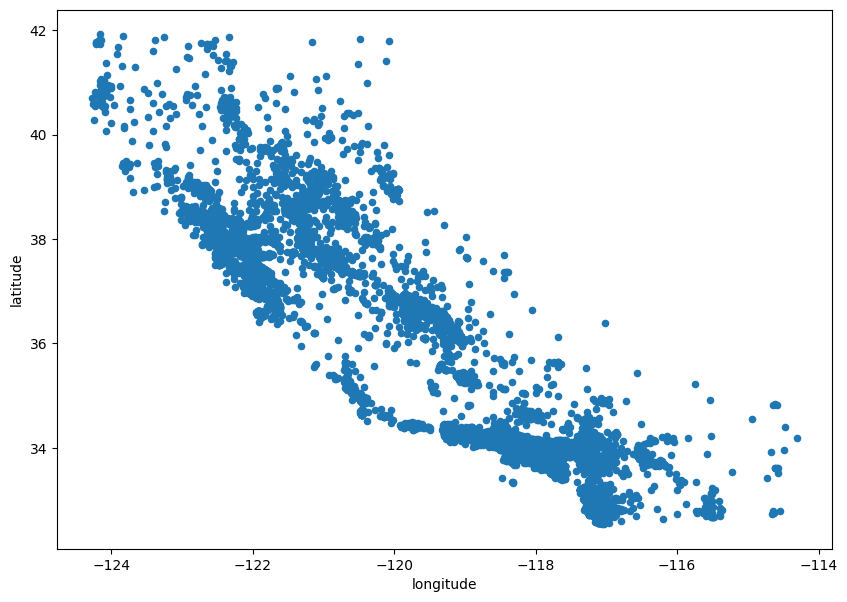

In [16]:
trainset.plot(x="longitude", y="latitude", kind="scatter", figsize=(10, 7))
plt.show()


Visualizar los datos nos permite ya observar la forma de California en el resultado, aunque todavía no podemos obtener ninguna información relevante. Jugando con la visualización, podemos intentar descubrir las zonas más pobladas (típicamente más caras). Para ello, podemos dibujar cada manzana de forma semitransparente, para ver dónde se concentran más manzanas.

<Axes: xlabel='longitude', ylabel='latitude'>

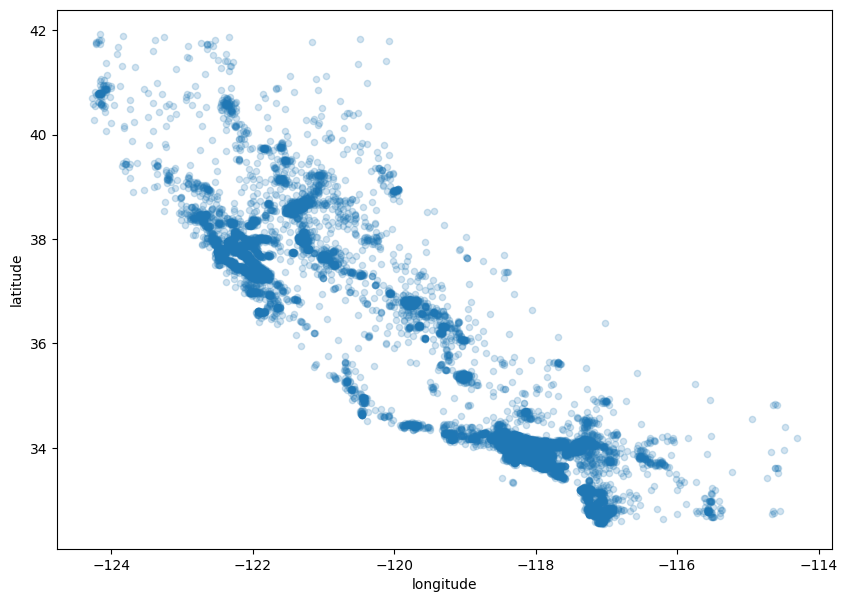

In [17]:
# alpha es un parámetro de matplotlib que se lo pasamos a través del método plot del DataFrame
# Recordad que matplotlib está "por debajo" de pandas, se usa de forma implícita
# alpha es un nivel de transparencia (las zonas en las que se acumulan muchos datos se ven más oscuras)

trainset.plot(x="longitude", y="latitude", kind="scatter", alpha=0.2, figsize=(10, 7))


Como es habitual, la gente tiende a agruparse en áreas concretas, seguramente son áreas cercanas a ciudades importantes. Las ciudades con más población en California son Los Ángeles, San Diego, San José y San Francisco. Veamos dónde están situadas en el mapa.

Si buscamos las [coordenadas](https://www.latlong.net/) del centro de cada ciudad, y las visualizamos junto al resto de los datos, podremos comprobar si son zonas de alta densidad

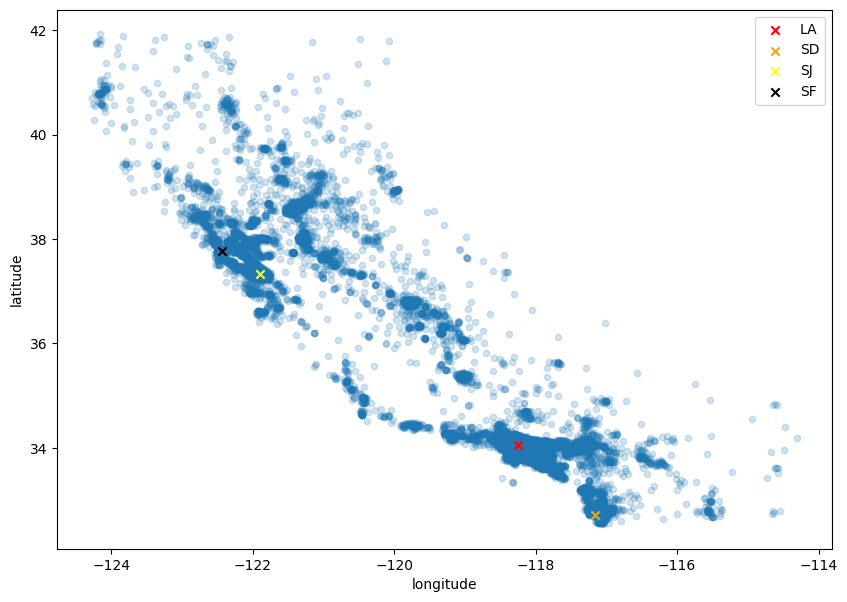

In [18]:
# Info obtenida de: https://www.latlong.net/
LA={"lat":34.052235, "lon":-118.243683} # Los Angeles
SD={"lat":32.715736, "lon":-117.161087} # San Diego
SJ={"lat":37.335480, "lon":-121.893028} # San Jose
SF={"lat":37.773972, "lon":-122.431297} # San Francisco

ax = trainset.plot(x="longitude", y="latitude", kind="scatter", alpha=0.2, figsize=(10, 7))
ax.scatter(LA["lon"], LA["lat"], color='red',    marker='x', label="LA") 
ax.scatter(SD["lon"], SD["lat"], color='orange', marker='x', label="SD") 
ax.scatter(SJ["lon"], SJ["lat"], color='yellow', marker='x', label="SJ") 
ax.scatter(SF["lon"], SF["lat"], color='black',  marker='x', label="SF") 
plt.legend()
plt.show()


Efectivamente, las grandes ciudades están situadas en zonas altamente pobladas. Para comprobar si las zonas más densas son las más caras, necesitamos incorporar color al gráfico representando el precio de la vivienda. Además, vamos a generar puntos más o menos grandes en función de la población total de la manzana.

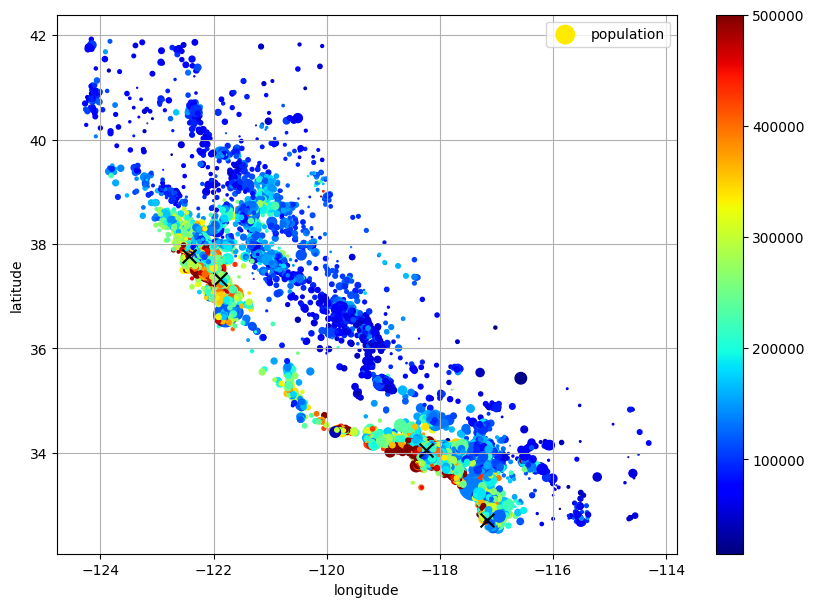

In [19]:
# El parámetro 's' representa el tamaño del marcador en el plot, que depende de trainset["population"]
# El parámetro 'c' representa el color, que depende de trainset["median_house_value"]
# El parámetro 'cmap' indica el mapa de color a emplear

ax = trainset.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=trainset["population"] / 100, label="population",
c=trainset["median_house_value"], cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))

ax.scatter(LA["lon"], LA["lat"], color='black', marker='x', s=100) 
ax.scatter(SD["lon"], SD["lat"], color='black', marker='x', s=100) 
ax.scatter(SJ["lon"], SJ["lat"], color='black', marker='x', s=100) 
ax.scatter(SF["lon"], SF["lat"], color='black', marker='x', s=100) 
plt.show()

Vemos que, efectivamente, las zonas más densas son las más caras.

**Ejercicio para entregar en el aula virtual**

Aunque los datos parecen claros, repite la gráfica mostrando solamente las manzanas con el valor de la mediana del precio (*median_house_value*) superior al doble de la media, para comprobar dónde están localizadas. 

Fíjate en la nueva gráfica que has generado. Se observan más manzanas en el extremo alto del precio que en el anterior gráfico (donde estaban todas las observaciones). ¿Puedes modificar la gráfica original para que resalte más las manzanas con precios caros?

In [ ]:
### EJERCICIO ####
# Genera el código necesario para mostrar la gráfica solo con las manzanas que tienen una mediana del precio superior al doble de la media
# Pista: podéis generar una máscara booleana de qué observaciones cumplen una condición 
# y luego generar un (sub)dataframe en base a esa máscara




Ya sabemos que estar cerca de una ciudad grande tiende a subir los precios. Esto nos puede ayudar a pensar en nuevas variables que podamos crear (**ingeniería de variables**) que reflejen esto, y que podamos incluirlas en el modelo (ej. distancia con LA).



Pensando en la localización, también podemos considerar que la distancia a  la costa puede ser determinante en el precio.
Vamos a analizarlo está vez con *seaborn*, que facilita la forma de graficar con variables categóricas.
- Primero, graficaremos las observaciones y le daremos color según su categoría en *ocean_proximity*.
- Segundo, cruzaremos las zonas con los precios medios de las viviendas.


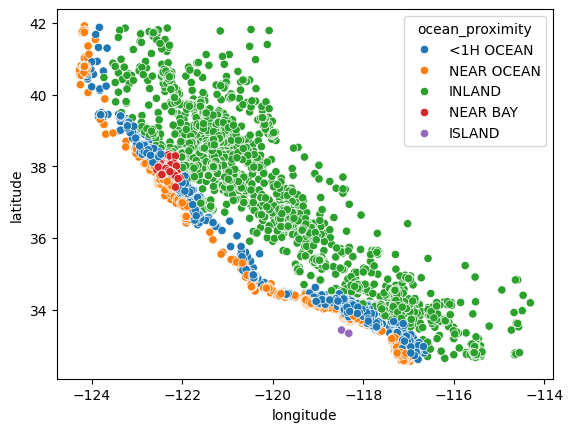

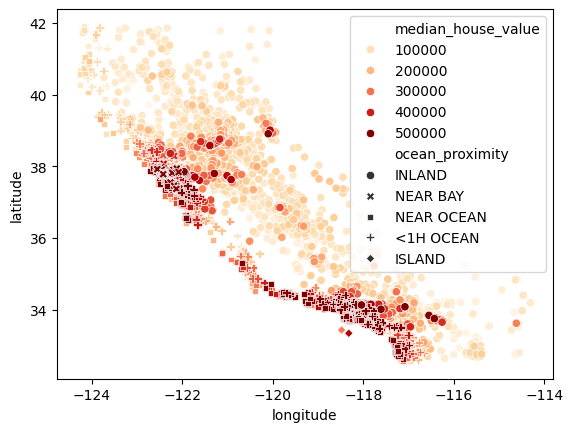

In [21]:
# Primero graficaremos las observaciones y le daremos color según su categoría en ocean_proximity.
sns.scatterplot(data=trainset, x="longitude", y="latitude", hue="ocean_proximity")
plt.show()

trainset = trainset.sort_values(by="median_house_value", ascending=True, inplace=False)

# Segundo cruzaremos las zonas con los precios.
# El parámetro "hue" nos proporciona el color (usamos otra paleta porque seaborn no tiene jet)
# El parámetro style nos permite poner formas diferentes en los marcadores según "ocean_proximity"
sns.scatterplot(data=trainset, x="longitude", y="latitude", hue="median_house_value", style="ocean_proximity", palette="OrRd")
plt.show()
# Las zonas más caras tienen marcadores diferentes (parámetro style)


Claramente, se observa que las zonas próximas al mar son más caras.

### 7.2. Búsqueda de correlaciones entre variables

Es adecuado y típico analizar la correlación entre las variables de nuestro dataset para intuir la importancia de cada una de ellas para el futuro modelo. La mayoría de las librerías nos proporcionan una forma fácil de calcular el **coeficiente de correlación de Pearson**. 


![alt text](img/pearson.png "Correlacion Pearson")

**Antención**: el coeficiente de correlación de Pearson solo identifica correlaciones lineales (ej. si *'x'* sube entonces *'y'* sube -o baja-). No tiene en cuenta correlaciones no lineales, las cuales son habituales en muchos problemas reales.

La siguiente figura (fuente [wikipedia](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)) muestra el valor de correlación de Pearson ante dos variables (x e y). Fijaos como la fila inferior tiene siempre valor cero, a pesar de que claramente las variables no son independientes.


![alt text](img/ejCorrelacion.png "Correlacion no lineal")



Analicemos en nuestro caso las características más correlacionadas con nuestra variable objetivo (*median_house_value*):

In [22]:
data_corr = trainset.corr(numeric_only=True)
print(data_corr["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688160
total_rooms           0.137847
housing_median_age    0.105056
households            0.068021
total_bedrooms        0.052488
population           -0.022207
longitude            -0.040420
latitude             -0.147578
Name: median_house_value, dtype: float64

El coeficiente de correlación varía de –1 a 1. Cuando está cerca de 1, significa que hay una fuerte correlación positiva; por ejemplo, el precio de la vivienda tiende a subir cuando los ingresos suben. Cuando el coeficiente está cerca de –1, significa que hay una fuerte correlación negativa; puedes ver una pequeña correlación negativa entre la latitud y el valor promedio de la vivienda (es decir, los precios tienden a bajar ligeramente cuando vas hacia el norte). Finalmente, los coeficientes cercanos a 0 significan que no hay correlación lineal.

Interpretación de los coeficientes positivos:
- 0 Nula
- $>$0.0 – 0.2 Muy baja
- $>$0.2 – 0.4 Baja
- $>$0.4 – 0.6 Moderada
- $>$0.6 – 0.8 Alta
- $>$0.8 – $<$1.0 Muy alta
- 1.0 Perfecta


Otra forma de analizar la correlación suele ser la matriz de correlación, ya que nos permite calcular la correlación entre todas las variables de forma visual. Emplearemos en este caso **Seaborn**, por la simplicidad que aporta la función <code>heatmap()</code>.

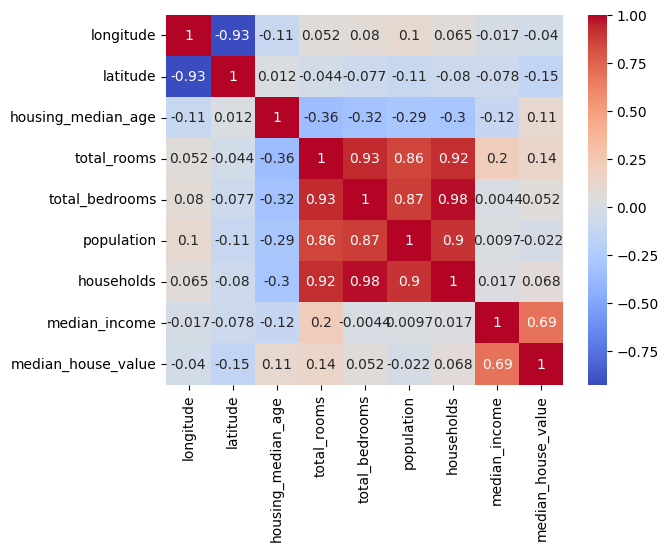

In [23]:
# Crear un heatmap con la correlación de Pearson a través de Seaborn
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

Otra modo de analizar la correlación de atributos es empleando el método <code>scatter_matrix()</code> de Pandas.

Cada persona encontrará los gráficos con los que se encuentre más cómodo. También es habitual que algunos gráficos faciliten la interpretación más que otros, dependiendo del problema.

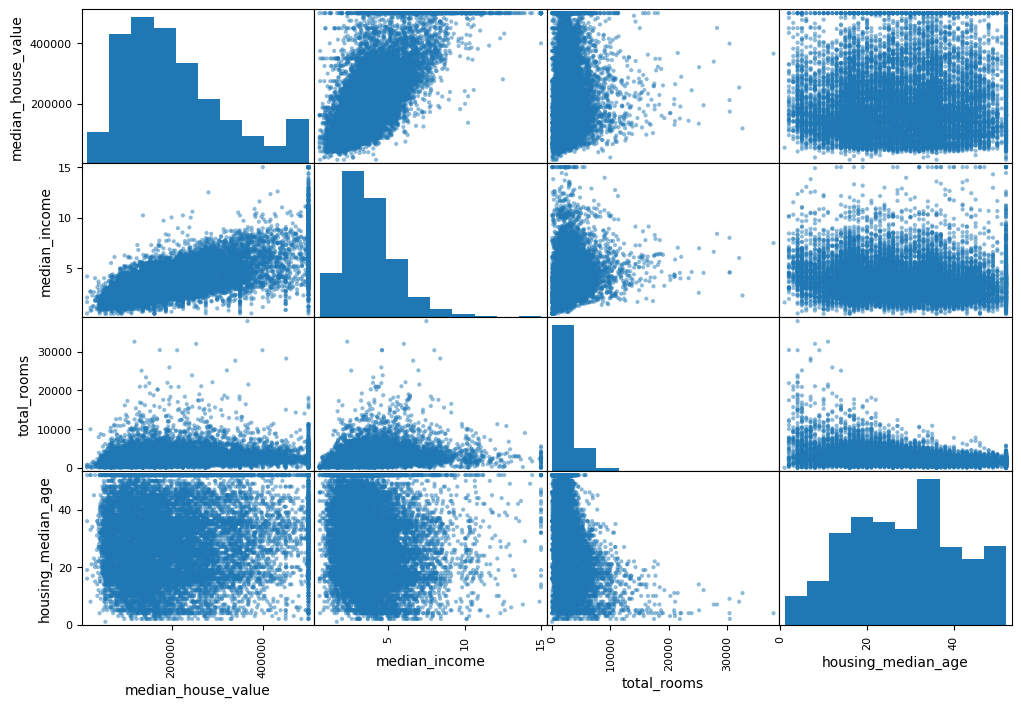

In [24]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
pd.plotting.scatter_matrix(trainset[attributes], figsize=(12, 8))
plt.show()

La característica con la correlación más alta y más interesante para profundizar en el análisis es *median_income*.

**Ejercicio para entregar en el aula virtual**
  
Genera un scatterplot entre *median_income* y *median_house_value* (puedes emplear Seaborn o Pandas).

In [ ]:
### EJERCICIO ###
# Genera y analiza un scatterplot entre *median_income* y *median_house_value* (puedes emplear Seaborn o Pandas).



El diagrama muestra gráficamente el nivel de correlación y se puede ver claramente el límite superior en el precio como una línea horizontal en el precio de 500k. Este *plot* muestra, de forma menos clara,  otras líneas horizontales en torno a los 450k, 350k, 280k, etc. Quizás nos interese eliminar las manzanas que tienen esos límites para prevenir que los modelos "aprendan" esos "artefactos".

### 7.3. Ingeniería de variables

A medida que exploramos los datos y los entendemos mejor, nos pueden surgir nuevas hipótesis de trabajo, y que esto nos lleve a la creación de nuevas variables (**ingeniería de variables**). Esta parte puede ser más o menos compleja. Lo más simple puede ser buscar combinaciones de características ya existentes que juntas proporcionen más información que por separado. Vamos a generar diferentes combinaciones de atributos y vamos a analizar su correlación para, con suerte, mejorar las métricas.


Por ejemplo, el número total de habitaciones en una manzana no es muy útil si no sabes cuántos hogares hay. Lo que realmente nos interesa conocer  es el **número de habitaciones por hogar**. Del mismo modo, el número total de  dormitorios por sí solo no es muy útil y probablemente lo que nos interese es compararlo con el número de habitaciones/habitáculos del hogar, es decir, el **ratio de dormitorios vs habitaciones**. Por último, las **personas por hogar** también parece una combinación de atributos interesante de observar. 

**Ejercicio para entregar en el aula virtual**

Genera los siguientes atributos nuevos (añadiéndolos al dataset) y calcula la correlación de todas los atributos del dataset con la variable objetivo. Destaca lo más reseñable.
- $rooms\_per\_house=\frac{total\_rooms}{households}$.  Media de habitaciones por casa  
- $bedrooms\_ratio=\frac{total\_bedrooms}{total\_rooms}$. Ratio de dormitorios vs habitaciones
- $people\_per\_house=\frac{population}{households}$. Media de habitantes por casa


In [ ]:
### EJERCICIO ###
# Añade al dataset los siguientes atributos nuevos, y calcula la correlación de todas los atributos del dataset con la variable objetivo. 
# rooms_per_house
# bedrooms_ratio
# people_per_house






Parece que la generación de estas nuevas variables ha aportado más información. 
El nuevo atributo *bedrooms_ratio* está  más correlacionado con la mediana del valor de la vivienda que el número total de habitaciones o dormitorios (variables que forman el ratio). Aparentemente, las casas con una proporción de dormitorio/habitación más baja tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito.  Obviamente, cuanto más grandes son las casas, más caras son.

Esta ronda de exploración no tiene que ser absolutamente exhaustiva. Necesitamos comenzar a entender el problema y obtener información que  ayude a obtener un primer prototipo razonablemente bueno. **Este es un proceso iterativo** y, una vez que tengas un prototipo, será necesario analizar su salida para obtener más información y volver a este paso de exploración.